In [1]:
import pandas

tanggal = ["Month"]

origin = pandas.read_table("/content/airline.csv", sep=",", parse_dates=tanggal)

origin = origin.sort_values("Month")

origin = origin.set_index("Month")

origin.columns = ["Monthly"]

origin.iloc[:5]

,Monthly
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [2]:
origin.tail()

,Monthly
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [3]:
origin.isnull().sum().sum()

0

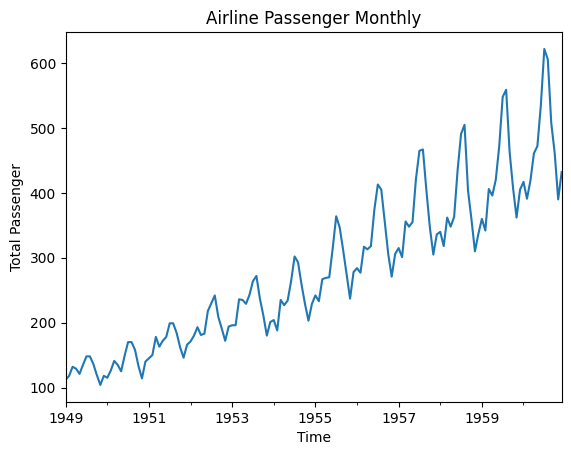

In [4]:
title = "Airline Passenger Monthly"

xlabel = "Time"

ylabel = "Total Passenger"

origin["Monthly"].plot.line(title=title, xlabel=xlabel, ylabel=ylabel);

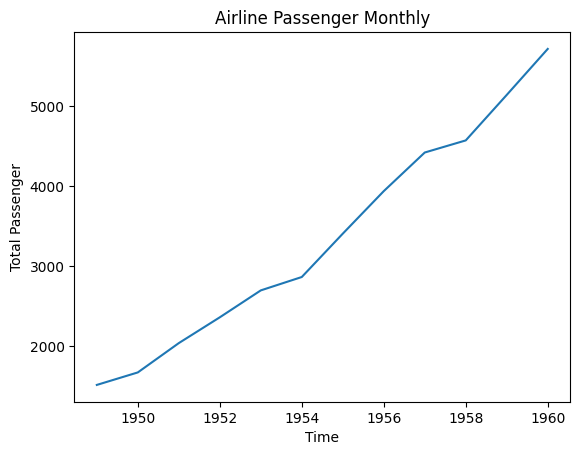

In [5]:
total = origin.groupby(origin.index.year)["Monthly"].sum()

total.plot.line(title=title, xlabel=xlabel, ylabel=ylabel);

In [6]:
from statsmodels.tsa.stattools import adfuller

tester = adfuller(origin)

result_p = tester[1]

result_p

0.991880243437641

In [7]:
origin["diff_one"] = origin["Monthly"].diff(1)

result_p = adfuller(origin["diff_one"].dropna())[1]

result_p

0.05421329028382478

In [8]:
origin["diff_dua"] = origin["Monthly"].diff(2)

result_p = adfuller(origin["diff_dua"].dropna())[1]

result_p

0.03862975767698902

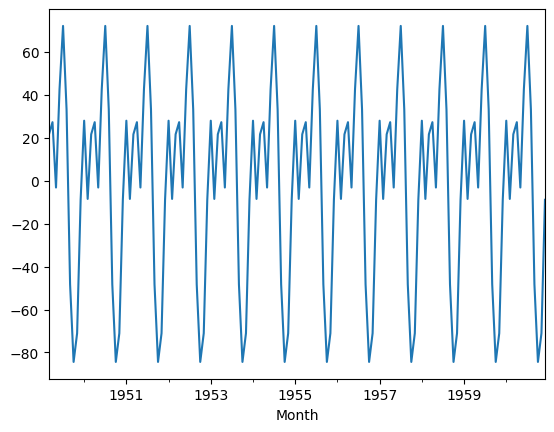

In [12]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(origin["diff_dua"].dropna(), model='additive')

decomposition.seasonal.plot();

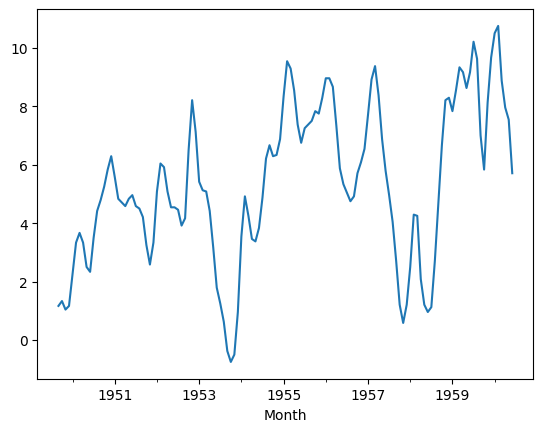

In [13]:
decomposition.trend.plot();

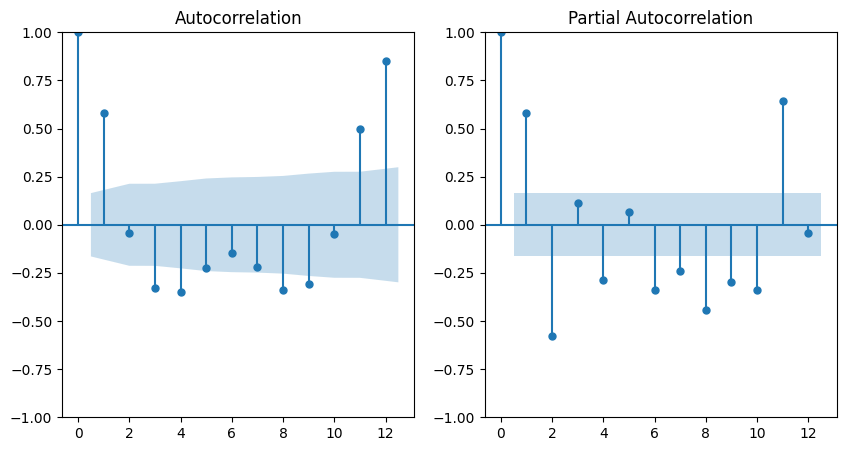

In [16]:
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

cate, axes = plt.subplots(1, 2, figsize=(10, 5))

plot_acf(origin["diff_dua"].dropna(), lags=12, ax=axes[0])

plot_pacf(origin["diff_dua"].dropna(), lags=12, ax=axes[1]);